## Callin Switzer
## train NN with Jorge's new data
## 23 Aug 2018

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import os
import pandas as pd
import time
from datetime import datetime
import sys
import csv
import seaborn as sns
import scipy.io
import subprocess
import csv

import tensorflow as tf
print("TensorFlow successfully installed.")
if tf.test.is_built_with_cuda():
    print("The installed version of TensorFlow includes GPU support.")

print(sys.version, "\n")

now = datetime.now()
print("last run on " + str(now))

#%qtconsole

# define directories
baseDir = os.getcwd()
dataDir = r'D:\MothSimulations\11c-AggressiveManeuver\Qstore\hws_am_con'
figDir = r'D:\Dropbox\mothMachineLearning_dataAndFigs\Figs'
dataOutput = r'D:\Dropbox\mothMachineLearning_dataAndFigs\DataOutput'
if not os.path.exists(dataOutput):
    os.mkdir(dataOutput)
    
    
# open file explorer
# aa = r'explorer /select,"'
# subprocess.Popen(str(aa + figDir + '\"'))
# subprocess.Popen(str(aa + dataDir + '\"'))

C:\Users\calli\Anaconda3\envs\deeplearning\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


TensorFlow successfully installed.
The installed version of TensorFlow includes GPU support.
3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)] 

last run on 2018-08-24 13:14:57.161347


In [ ]:
# import custom Utils functions
from DeepLearningUtils import *

In [2]:
def listdir_fullpath(d):
    return [os.path.join(d, f) for f in os.listdir(d)]

In [3]:
dataDir2 = r"D:\Dropbox\mothMachineLearning_dataAndFigs\DataOutput"
dataFiles = listdir_fullpath(dataDir2)
dataFiles

['D:\\Dropbox\\mothMachineLearning_dataAndFigs\\DataOutput\\Qstore_10_hws_am_con.hdf5',
 'D:\\Dropbox\\mothMachineLearning_dataAndFigs\\DataOutput\\Qstore_11_hws_am_con.hdf5',
 'D:\\Dropbox\\mothMachineLearning_dataAndFigs\\DataOutput\\Qstore_12_hws_am_con.hdf5',
 'D:\\Dropbox\\mothMachineLearning_dataAndFigs\\DataOutput\\Qstore_1_hws_am_con.hdf5',
 'D:\\Dropbox\\mothMachineLearning_dataAndFigs\\DataOutput\\Qstore_2_hws_am_con.hdf5',
 'D:\\Dropbox\\mothMachineLearning_dataAndFigs\\DataOutput\\Qstore_3_hws_am_con.hdf5',
 'D:\\Dropbox\\mothMachineLearning_dataAndFigs\\DataOutput\\Qstore_4_hws_am_con.hdf5',
 'D:\\Dropbox\\mothMachineLearning_dataAndFigs\\DataOutput\\Qstore_5_hws_am_con.hdf5',
 'D:\\Dropbox\\mothMachineLearning_dataAndFigs\\DataOutput\\Qstore_6_hws_am_con.hdf5',
 'D:\\Dropbox\\mothMachineLearning_dataAndFigs\\DataOutput\\Qstore_7_hws_am_con.hdf5',
 'D:\\Dropbox\\mothMachineLearning_dataAndFigs\\DataOutput\\Qstore_8_hws_am_con.hdf5',
 'D:\\Dropbox\\mothMachineLearning_dataA

In [4]:
dfList = []

for dataFile in dataFiles:
    bf2 = pd.read_hdf(dataFile, "data")
    bf2[['simNum', 'timestep']] = bf2[['simNum', 'timestep']].astype(int)
    bf2['count'] = bf2.groupby(["simNum", "timestep"]).cumcount()
    sdf = bf2.loc[(bf2["count"] == 0) | (bf2["count"] == 99), :]
    ss = sdf.pivot_table(index=['simNum', 'timestep'], columns = "count",aggfunc='first')
    ss.columns = [f'{i}_{j}' if j != '' else f'{i}' for i,j in ss.columns]
    ss.reset_index(inplace=True) 
    dfList.append(ss)
    print(dataFile)

D:\Dropbox\mothMachineLearning_dataAndFigs\DataOutput\Qstore_10_hws_am_con.hdf5
D:\Dropbox\mothMachineLearning_dataAndFigs\DataOutput\Qstore_11_hws_am_con.hdf5
D:\Dropbox\mothMachineLearning_dataAndFigs\DataOutput\Qstore_12_hws_am_con.hdf5
D:\Dropbox\mothMachineLearning_dataAndFigs\DataOutput\Qstore_1_hws_am_con.hdf5
D:\Dropbox\mothMachineLearning_dataAndFigs\DataOutput\Qstore_2_hws_am_con.hdf5
D:\Dropbox\mothMachineLearning_dataAndFigs\DataOutput\Qstore_3_hws_am_con.hdf5
D:\Dropbox\mothMachineLearning_dataAndFigs\DataOutput\Qstore_4_hws_am_con.hdf5
D:\Dropbox\mothMachineLearning_dataAndFigs\DataOutput\Qstore_5_hws_am_con.hdf5
D:\Dropbox\mothMachineLearning_dataAndFigs\DataOutput\Qstore_6_hws_am_con.hdf5
D:\Dropbox\mothMachineLearning_dataAndFigs\DataOutput\Qstore_7_hws_am_con.hdf5
D:\Dropbox\mothMachineLearning_dataAndFigs\DataOutput\Qstore_8_hws_am_con.hdf5
D:\Dropbox\mothMachineLearning_dataAndFigs\DataOutput\Qstore_9_hws_am_con.hdf5


In [5]:
trainDF = pd.concat(dfList)

In [6]:
trainDF = trainDF.drop(columns=['F_99', 'alpha_99', 
                               'tau_99'])
trainDF=trainDF.rename(columns = {'F_0':'F', 
                                 "alpha_0": "alpha", 
                                 "tau_0": "tau"})

In [7]:
trainDF.reset_index(inplace = True, drop = True)
print(trainDF.shape)
trainDF.head()

(3000000, 21)


,simNum,timestep,F,alpha,phi_0,phi_99,phi_dot_0,phi_dot_99,tau,theta_0,...,theta_dot_0,theta_dot_99,x_0,x_99,x_dot_0,x_dot_99,y_0,y_99,y_dot_0,y_dot_99
0,0,0,38304.433962,5.340270,3.926991,3.869604,0.000000,-5.674295,10963.268558,0.785398,...,0.000000,-4.770986,0.000000,6.853314,0.000100,683.734561,0.000000,-1.298536,0.000100,-133.752363
1,0,1,34264.536249,2.465501,3.948428,4.019544,2.009397,5.425513,72580.767201,0.768478,...,0.087406,10.479995,-0.019322,-6.079672,-0.145396,-606.129200,2.520087,6.366770,250.908304,120.273149
2,0,2,12045.791872,4.573819,3.966608,3.933017,-0.124272,-2.775517,93435.855346,0.768515,...,-1.029996,3.897680,0.509507,2.986736,52.490438,193.914740,4.834518,2.470847,-18.848146,-211.050011
3,0,3,35562.854879,0.767089,4.000007,4.111777,3.434103,7.246049,-96088.338473,0.773977,...,2.037211,0.318982,-0.836633,-4.334782,-187.046694,-157.064454,6.838940,17.508792,218.755312,844.589134
4,0,4,20856.636628,2.424378,4.009324,3.995061,-2.309667,0.686804,-27142.805375,0.815904,...,-0.673328,-1.304712,0.429770,2.895126,313.730247,-65.350386,8.392823,6.771320,-58.222983,-102.458917


In [8]:
trainDF.sort_values(["timestep", "simNum"], ascending = [True, True]).head()

,simNum,timestep,F,alpha,phi_0,phi_99,phi_dot_0,phi_dot_99,tau,theta_0,...,theta_dot_0,theta_dot_99,x_0,x_99,x_dot_0,x_dot_99,y_0,y_99,y_dot_0,y_dot_99
0,0,0,38304.433962,5.340270,3.926991,3.869604,0.0,-5.674295,10963.268558,0.785398,...,0.0,-4.770986,0.0,6.853314,0.0001,683.734561,0.0,-1.298536,0.0001,-133.752363
250000,0,0,6143.354049,5.961418,3.926991,3.916364,0.0,-0.645207,87574.132880,0.785398,...,0.0,5.559808,0.0,1.048256,0.0001,100.376445,0.0,0.278338,0.0001,33.038324
500000,0,0,39225.428283,2.578644,3.926991,3.965986,0.0,3.896474,-4419.593159,0.785398,...,0.0,3.493059,0.0,-6.930938,0.0001,-691.619443,0.0,-1.807255,0.0001,-184.465021
750000,0,0,35134.927163,5.362883,3.926991,3.878837,0.0,-5.083099,-47803.351578,0.785398,...,0.0,-8.347774,0.0,6.240726,0.0001,623.446483,0.0,-1.175431,0.0001,-130.983043
1000000,0,0,32213.096804,0.808635,3.926991,3.972678,0.0,4.276206,-50464.550819,0.785398,...,0.0,0.588181,0.0,-0.064673,0.0001,-1.809368,0.0,5.677857,0.0001,565.532615


In [9]:
trainDF.columns

Index(['simNum', 'timestep', 'F', 'alpha', 'phi_0', 'phi_99', 'phi_dot_0',
       'phi_dot_99', 'tau', 'theta_0', 'theta_99', 'theta_dot_0',
       'theta_dot_99', 'x_0', 'x_99', 'x_dot_0', 'x_dot_99', 'y_0', 'y_99',
       'y_dot_0', 'y_dot_99'],
      dtype='object')

In [10]:
# convert to fx and fy
trainDF["Fx"] = trainDF.F * np.cos(trainDF.alpha)
trainDF["Fy"] = trainDF.F * np.sin(trainDF.alpha)

# Keras models

In [11]:
# make dataset
X = trainDF.loc[:, ["x_0", "y_0", "phi_0", "theta_0", 
                    "x_99", "y_99", "phi_99", "theta_99"]]
Y = trainDF.loc[:, ["Fx", "Fy", "tau"] ]

# # # subtract x_0 and y_0 from everything
# X.x_99 = X.x_99 - X.x_0
# X.y_99 = X.y_99 - X.y_0

# X.x_0 = X.y_0 = 0

In [12]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.3, random_state = 123)

In [13]:
from sklearn.preprocessing import StandardScaler  
scalerX = StandardScaler()  
scalerY = StandardScaler()  

# Don't cheat - fit only on training data
scalerX.fit(Xtrain)  
scalerY.fit(Ytrain) 

Xtrain_scaled = scalerX.transform(Xtrain)  
Ytrain_scaled = scalerY.transform(Ytrain)  

# apply same transformation to test data
Xtest_scaled = scalerX.transform(Xtest)
Ytest_scaled = scalerY.transform(Ytest)

In [14]:
# from sklearn.preprocessing import MinMaxScaler  
# scalerX = MinMaxScaler()  
# scalerY = MinMaxScaler()  

# # Don't cheat - fit only on training data
# scalerX.fit(Xtrain)  
# scalerY.fit(Ytrain) 

# Xtrain_scaled = scalerX.transform(Xtrain)  
# Ytrain_scaled = scalerY.transform(Ytrain)  

# # apply same transformation to test data
# Xtest_scaled = scalerX.transform(Xtest)
# Ytest_scaled = scalerY.transform(Ytest)

In [15]:
# build Keras model with functional API, instead of Sequential
from keras.layers import Input, Dense
from keras.models import Model

# callcacks
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau

Using TensorFlow backend.


In [16]:
inputs = Input(shape=(Xtrain_scaled.shape[1],))

x = Dense(400, activation='tanh')(inputs)
x = Dense(400, activation='tanh')(x)
x = Dense(400, activation='tanh')(x)
x = Dense(16, activation='tanh')(x)
predictions = Dense(Ytrain_scaled.shape[1], activation='linear')(x)

# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=predictions)
model.compile(loss="mse", optimizer="adam", metrics = ['mse'])

In [33]:
earlystop = EarlyStopping(monitor='val_mean_squared_error', patience=50, 
                          verbose=1, mode='auto', min_delta = 0.0001)

history = model.fit(Xtrain_scaled, Ytrain_scaled, validation_split = 0.3, 
                    verbose = 2, batch_size=2**13, epochs = 1000, 
                    callbacks = [earlystop])

Train on 1470000 samples, validate on 630000 samples
Epoch 1/1000
 - 2s - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0014 - val_mean_squared_error: 0.0014
Epoch 2/1000
 - 2s - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0014 - val_mean_squared_error: 0.0014
Epoch 3/1000
 - 2s - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 4/1000
 - 2s - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 5/1000
 - 2s - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 6/1000
 - 2s - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 7/1000
 - 2s - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 8/1000
 - 2s - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 9/1000
 - 2s - loss: 

In [34]:
def plot_model_history(model_history, saveFig = False):
    fig, axs = plt.subplots(1,1,figsize=(10,5))
    # summarize history for accuracy
    axs.plot(range(1,len(model_history.history['mean_squared_error'])+1),
             model_history.history['mean_squared_error'])
    axs.plot(range(1,len(model_history.history['val_mean_squared_error'])+1),
             model_history.history['val_mean_squared_error'])
    axs.set_title('Model MSE')
    axs.set_ylabel('mean_squared_error')
    axs.set_xlabel('Epoch')
    axs.set_xticks(np.arange(1,len(model_history.history['val_mean_squared_error'])+1),
                   len(model_history.history['val_mean_squared_error'])/10)
    axs.legend(['train', 'val'], loc='best')
    if saveFig:
        fig.savefig(os.path.join(figDir, "ModelTraining.png"), dpi = 120, bbox_inches='tight')
    plt.show()

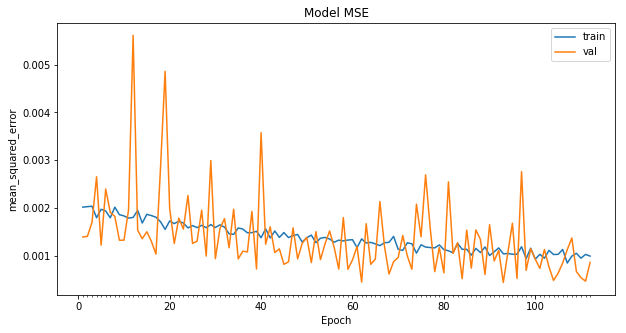

In [35]:
plot_model_history(history, saveFig = False)

In [36]:
nnpreds = model.predict(Xtest_scaled)

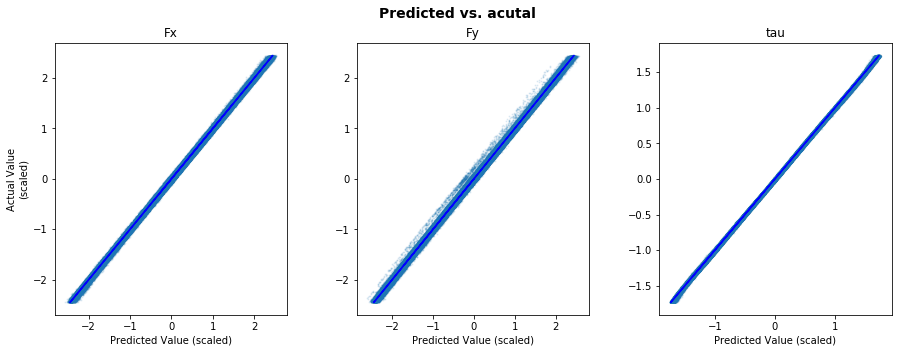

In [37]:
plt.close("all")
fig, axs = plt.subplots(1,3, figsize=(15, 5), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.1, wspace=0.3)
fig.suptitle('Predicted vs. acutal ', fontsize=14, fontweight='bold')

axs = axs.ravel()

nms = ["Fx", "Fy", "tau"]

for ii in range(3):
    # read in image
    
    try:
        axs[ii].scatter(y = Ytest_scaled[:,ii],x = nnpreds[:,ii], s = 1, alpha = 0.1 )
        axs[ii].set_xlabel("Predicted Value (scaled)")
        if(ii == 0):
            axs[ii].set_ylabel("Actual Value\n(scaled)")
        axs[ii].set_title(nms[ii])
        axs[ii].plot(Ytest_scaled[:,ii], Ytest_scaled[:,ii], 'b')
    except:
        pass

    
fig.savefig(os.path.join(figDir, "NNPreds_newData_control_bigbatch_FxFy.png"), dpi = 120, bbox_inches='tight')

In [38]:
# refref: idea - predict whole paths, rather than just the endpoint

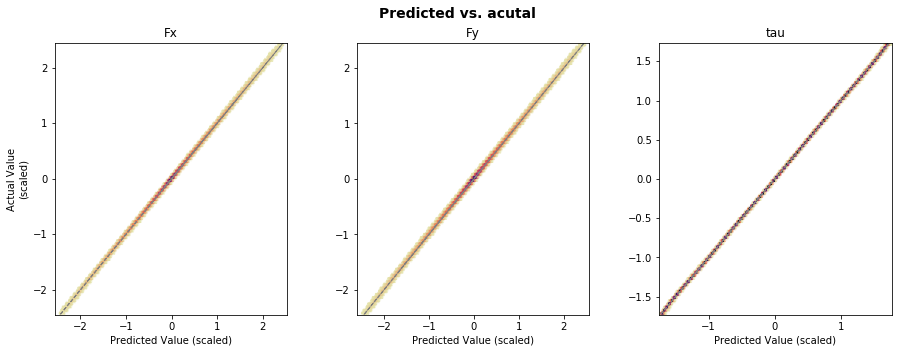

In [39]:
plt.close("all")
fig, axs = plt.subplots(1,3, figsize=(15, 5), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.1, wspace=0.3)
fig.suptitle('Predicted vs. acutal ', fontsize=14, fontweight='bold')

axs = axs.ravel()

nms = ["Fx", "Fy", "tau"]


# replace lightest colors with white
import matplotlib.colors

cmap = plt.cm.magma_r
cmaplist = np.array([cmap(i) for i in range(cmap.N)])
#cmaplist[0:2] = np.repeat((0.0,0.0,0.0,0.0), 2).reshape(-1,4)
cmaplist[:,0:3] = np.divide(cmaplist[:, 0:3], 1.1)
#cmaplist[:,0:3] = np.transpose(np.vstack([np.linspace(1, 0, 256), np.linspace(1, 0, 256), np.linspace(1, 0, 256)]))
cmaplist[0] = (1,1,1,0.5)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('mcm',cmaplist, cmap.N)

for ii in range(3):
    # read in image
    
    try:
        axs[ii].hexbin(y = Ytest_scaled[:,ii],x = nnpreds[:,ii], gridsize = 150, cmap = cmap)
        axs[ii].set_xlabel("Predicted Value (scaled)")
        if(ii == 0):
            axs[ii].set_ylabel("Actual Value\n(scaled)")
        axs[ii].set_title(nms[ii])
        axs[ii].plot(Ytest_scaled[:,ii], Ytest_scaled[:,ii], 'grey', linewidth = 1, linestyle  = "--")
    except:
        pass

fig.savefig(os.path.join(figDir, "NNPreds_newData_control_bigbatch_FxFy_hexbin.png"), dpi = 120, bbox_inches='tight')

In [ ]:
bf2[['simNum', 'timestep']] = bf2[['simNum', 'timestep']].astype(int)

bf2['count'] = bf2.groupby(["simNum", "timestep"]).cumcount()

bf2.head()

bf2.tail()

sdf = bf2.loc[(bf2["count"] == 0) | (bf2["count"] == 99), :]
sdf.head()

ss = sdf.pivot_table(index='simNum', columns = "count",aggfunc='first')
ss.columns = [f'{i}_{j}' if j != '' else f'{i}' for i,j in ss.columns]
ss["simNum"] = ss.index
ss.index.name = None
ss.head()

np.array(ss).shape

np.vstack([np.array(ss), np.array(ss)]).shape